In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/archive (1)/healthcare-dataset-stroke-data.csv")
data.drop('id', axis = 1, inplace = True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,yes
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,yes
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,yes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,yes
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 422.0+ KB


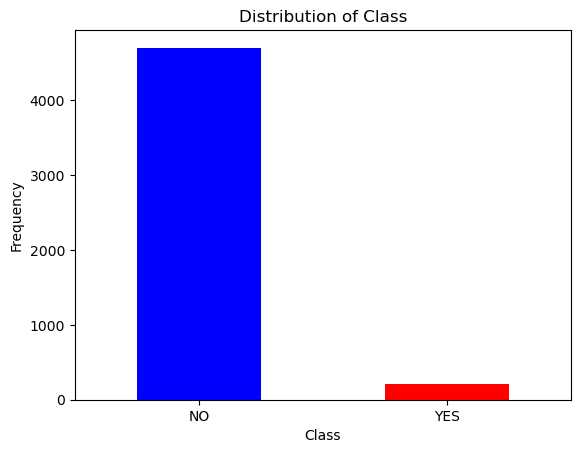

In [3]:
labels = ['NO','YES']
sh = pd.Series(data['stroke']).value_counts(sort = True)
sh.plot(kind = 'bar',rot = 0,color = ['blue','red'])
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title('Distribution of Class')
plt.show()

Label Encoding

In [4]:
encoder = LabelEncoder()
cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for col in cols:
    data[col] = encoder.fit_transform(data[col])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


Heatmap showing correlation between variables

<Axes: >

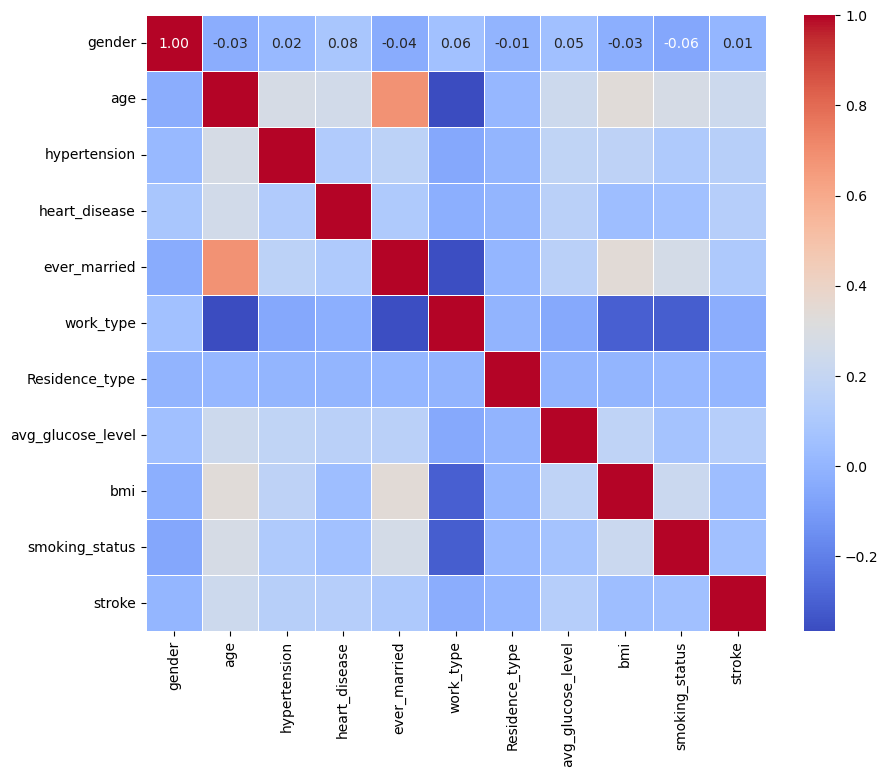

In [5]:
corr = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot = True, cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)

Splitting Data 

In [6]:
X_features = data.iloc[:,0:10]
y_label = data.iloc[:,10]

Splitting data to training data and testing data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 42)
print('Size of train set: ',X_train.shape)
print('Size of test set: ',X_test.shape)

Size of train set:  (3927, 10)
Size of test set:  (982, 10)


Applying Algorithms

### Naive Bayes Classifier

In [33]:
model = GaussianNB()
model = model.fit(X_train,y_train)
x_pred = model.predict(X_train)
accuracy = metrics.accuracy_score(y_train,x_pred)
print('Train acuracy of the Naive bayes algorithm is :')
print(round(accuracy*100,3),'%') 

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Test acuracy of the Naive bayes algorithm is :')
print(round(accuracy*100,3),'%') 

Train acuracy of the Naive bayes algorithm is :
87.089 %
Test acuracy of the Naive bayes algorithm is :
87.678 %


### Random Forest classifier

In [34]:
test_acc = []
train_acc = []
for i in range(1,21):
    model = RandomForestClassifier(max_depth = i)
    
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    
    train_accuracy = accuracy_score(y_train,y_pred)
    train_acc.append(train_accuracy)

    p_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,p_pred)
    test_acc.append(test_accuracy)

    print(f'>> {i} Train: {train_accuracy:>3f}--- Test: {test_accuracy:>3f}')

>> 1 Train: 0.960275--- Test: 0.946029
>> 2 Train: 0.960275--- Test: 0.946029
>> 3 Train: 0.960275--- Test: 0.946029
>> 4 Train: 0.960275--- Test: 0.946029
>> 5 Train: 0.961039--- Test: 0.946029
>> 6 Train: 0.961294--- Test: 0.946029
>> 7 Train: 0.962058--- Test: 0.946029
>> 8 Train: 0.965623--- Test: 0.946029
>> 9 Train: 0.970461--- Test: 0.946029
>> 10 Train: 0.975809--- Test: 0.946029
>> 11 Train: 0.981411--- Test: 0.946029
>> 12 Train: 0.988032--- Test: 0.946029
>> 13 Train: 0.991851--- Test: 0.946029
>> 14 Train: 0.996180--- Test: 0.946029
>> 15 Train: 0.997963--- Test: 0.946029
>> 16 Train: 0.999236--- Test: 0.946029
>> 17 Train: 1.000000--- Test: 0.946029
>> 18 Train: 1.000000--- Test: 0.946029
>> 19 Train: 1.000000--- Test: 0.946029
>> 20 Train: 1.000000--- Test: 0.946029


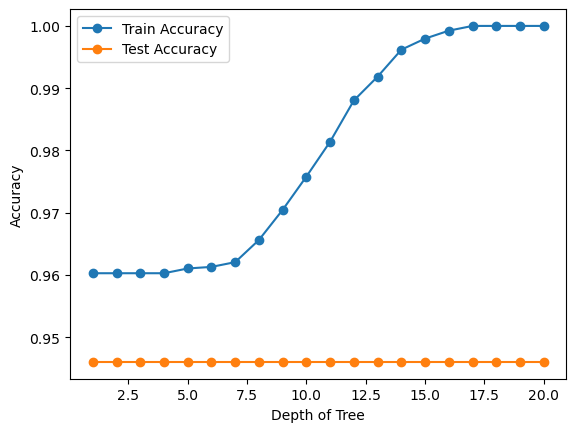

In [35]:
pyplot.plot(list(range(1,21)),train_acc,'-o',label = 'Train Accuracy')
pyplot.plot(list(range(1,21)),test_acc,'-o',label = 'Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

In [36]:
rmodel = RandomForestClassifier()
    
rmodel = rmodel.fit(X_train,y_train)
y_pred = rmodel.predict(X_train)
    
train_accuracy = accuracy_score(y_train,y_pred)
print('Train accuracy: ',round(train_accuracy*100,2))

p_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test,p_pred)
print('Train accuracy: ',round(test_accuracy*100,2))

Train accuracy:  100.0
Train accuracy:  94.6


#### Using Grid search CV

In [12]:
param_grid = {
    'n_estimators': [50,80, 100, 150, 180,200,220],
    'max_depth': [2,5, 10,15, 20],
    'min_samples_split': [2, 5, 10]
}

Grid Search CV works by selecting the combination of all parameters in the parameter grid and gives the best combination of parameter which increases the model's performance

In [13]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 80, 100, 150, 180, 200, 220]},
             scoring='accuracy')

In [14]:
print('Best estimators')
grid_search.best_estimator_

Best estimators


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [15]:
print(f'Training accuracy:  {accuracy_score(y_train,grid_search.best_estimator_.predict(X_train)):.2%}')
print(f'Test accuracy: {accuracy_score(y_test,grid_search.best_estimator_.predict(X_test)):.2%}')

Training accuracy:  96.21%
Test accuracy: 94.60%


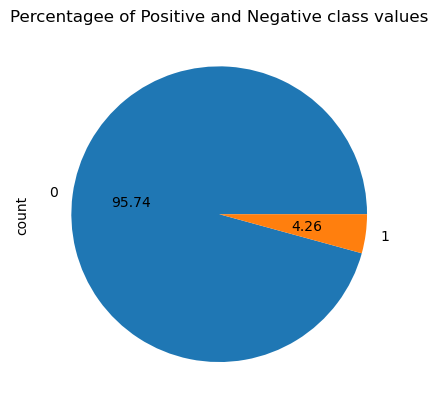

In [16]:
print()
y_label.value_counts().plot.pie(autopct = '%.2f')
plt.title('Percentagee of Positive and Negative class values')
plt.show()

Balancing Class

In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X, y = rus.fit_resample(X_features, y_label)

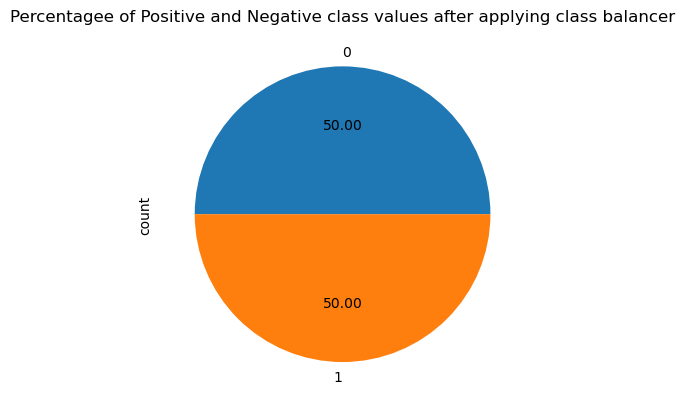

In [18]:
y.value_counts().plot.pie(autopct = '%.2f')
plt.title('Percentagee of Positive and Negative class values after applying class balancer')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Applying Naive Bayes Classifier for balanced data

In [20]:
model = GaussianNB()
model = model.fit(X_train,y_train)
x_pred = model.predict(X_train)
accuracy = metrics.accuracy_score(y_train,x_pred)
print('The acuracy of the Naive bayes algorithm is :')
print(f'{accuracy:.3%}') 

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('The acuracy of the Naive bayes algorithm is :')
print(f'{accuracy:.3%}') 


The acuracy of the Naive bayes algorithm is :
71.856%
The acuracy of the Naive bayes algorithm is :
82.143%


#### Applying Random Forest CLassifier for balanced data

In [21]:
test_acc = []
train_acc = []
for i in range(1,21):
    model = RandomForestClassifier(max_depth = i)
    
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    
    train_accuracy = accuracy_score(y_train,y_pred)
    train_acc.append(train_accuracy)

    p_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,p_pred)
    test_acc.append(test_accuracy)

    print(f'>> {i} Train: {train_accuracy:.3%}--- Test: {test_accuracy:.3%}')

>> 1 Train: 73.653%--- Test: 86.905%
>> 2 Train: 75.749%--- Test: 86.905%
>> 3 Train: 76.946%--- Test: 85.714%
>> 4 Train: 79.940%--- Test: 84.524%
>> 5 Train: 83.234%--- Test: 85.714%
>> 6 Train: 88.024%--- Test: 84.524%
>> 7 Train: 92.216%--- Test: 85.714%
>> 8 Train: 96.108%--- Test: 84.524%
>> 9 Train: 98.503%--- Test: 83.333%
>> 10 Train: 100.000%--- Test: 83.333%
>> 11 Train: 100.000%--- Test: 83.333%
>> 12 Train: 100.000%--- Test: 83.333%
>> 13 Train: 100.000%--- Test: 83.333%
>> 14 Train: 100.000%--- Test: 83.333%
>> 15 Train: 100.000%--- Test: 84.524%
>> 16 Train: 100.000%--- Test: 84.524%
>> 17 Train: 100.000%--- Test: 83.333%
>> 18 Train: 100.000%--- Test: 84.524%
>> 19 Train: 100.000%--- Test: 84.524%
>> 20 Train: 100.000%--- Test: 83.333%


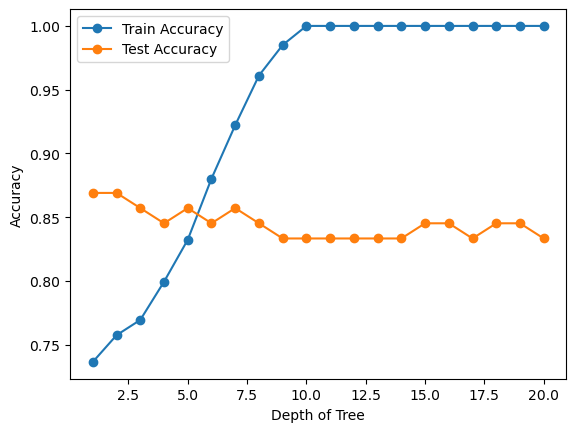

In [22]:
pyplot.plot(list(range(1,21)),train_acc,'-o',label = 'Train Accuracy')
pyplot.plot(list(range(1,21)),test_acc,'-o',label = 'Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

In [23]:
model = RandomForestClassifier()
    
RF_model = model.fit(X_train,y_train)
y_pred = RF_model.predict(X_train)
    
train_accuracy = accuracy_score(y_train,y_pred)
print('Train accuracy: ',round(train_accuracy*100,2))

p_pred = RF_model.predict(X_test)
test_accuracy = accuracy_score(y_test,p_pred)
print('Train accuracy: ',round(test_accuracy*100,2))

Train accuracy:  100.0
Train accuracy:  84.52


In [24]:
param_grid = {
    'n_estimators': [50,80, 100, 150, 180,200,220],
    'max_depth': [2,5, 10,15, 20],
    'min_samples_split': [2, 5, 10]
}

In [25]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 80, 100, 150, 180, 200, 220]},
             scoring='accuracy')

In [26]:
print('Best estimators')
grid_search.best_estimator_

Best estimators


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=50)

In [27]:
print(f'Training accuracy:  {accuracy_score(y_train,grid_search.best_estimator_.predict(X_train)):.2%}')
print(f'Test accuracy: {accuracy_score(y_test,grid_search.best_estimator_.predict(X_test)):.2%}')

Training accuracy:  88.92%
Test accuracy: 83.33%


Selecting Random Forest classifier to predict new data

In [39]:
X_features.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2438,0,59.0,0,0,1,2,0,123.47,27.5,0
4304,0,36.0,0,0,1,3,1,77.92,24.9,0
1837,0,31.0,0,0,0,3,0,75.27,27.3,2
1214,1,8.0,0,0,0,4,1,88.83,18.5,0
1456,0,13.0,0,0,0,4,0,93.30,25.9,0


In [40]:
new_data = np.array([[1,50.0,0,0,1,2,1,100.00,29.0,0]])
new_df = pd.DataFrame(new_data, columns = X_features.columns)
rf_pred = rmodel.predict(new_df)

if rf_pred[0]:
    print('Prediction: Stroke risk is high.')
else:
    print('Prediction: No stroke risk detected.')

Prediction: No stroke risk detected.
